<h1>Hello World!</h1>

Starting the process of keeping update with Computer Vision Technology so this notebook will be keeping update as the time goes with new mini projects about the field.print

Mini Projects as said because if I start with a new project that isn't simple at all, I might better just do a diferent notebook for

<h1>Classic Image Processing Algorithms</h1>


<h3>Color change and Histogram

(1080, 1920, 3)
(1080, 1920, 3)


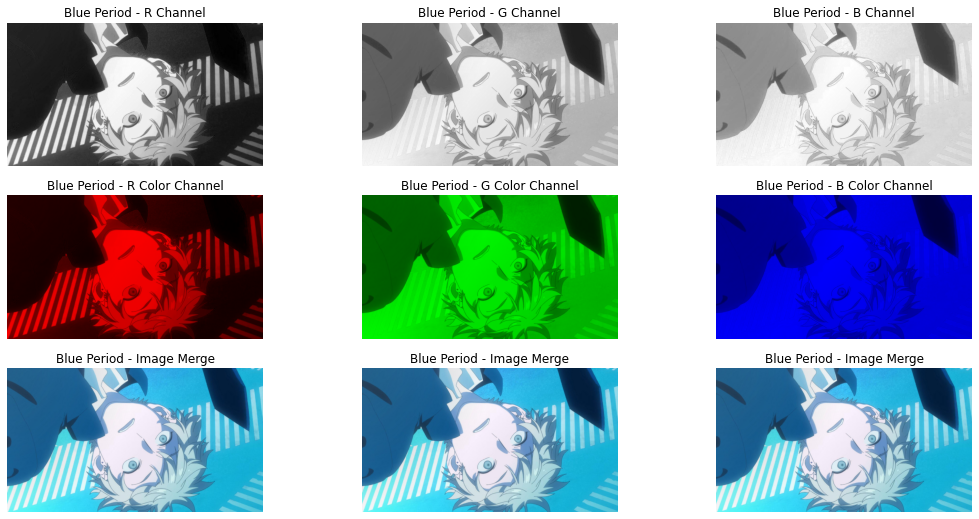

In [50]:
##### Images, Colors and Histograms #####

#Importing Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read Image
img = cv.imread('blue-period.jpg', cv.IMREAD_COLOR)
# Note: OpenCV read images as BGR instead of RGB so we need to convert.

#Get each BGR part of Image
b_gimg, g_gimg, r_gimg = cv.split(img)

#Other Method to split channels
#b_img = img[:,:, 0]
#g_img = img[:,:, 1]
#r_img = img[:,:, 2]

# Converting Image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#Convert to Gray Scale
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#Merge Image again
merge_img = cv.merge((r_gimg, g_gimg, b_gimg))

#Shows Image Shape
print (img.shape)

# Copy the image
r_img = img.copy()
g_img = img.copy()
b_img = img.copy()

# Another way to get a variable with same shape of the image
copyimg = np.zeros(shape=img.shape, dtype=np.uint8)
print (copyimg.shape)

# Set green and blue channels to 0
r_img[:,:,1] = 0
r_img[:,:,2] = 0

# Set red and blue channels to 0
g_img[:,:,0] = 0
g_img[:,:,2] = 0

# Set green and red channels to 0
b_img[:,:,0] = 0
b_img[:,:,1] = 0








#Print Channels Images
plt.subplot(3, 3, 1)
plt.imshow(r_gimg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - R Channel')
plt.subplot(3, 3, 2)
plt.imshow(g_gimg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - G Channel')
plt.subplot(3, 3, 3)
plt.imshow(b_gimg, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - B Channel')

#Print channels Images Colored
plt.subplot(3, 3, 4)
plt.imshow(r_img)
plt.axis('off')
plt.title('Blue Period - R Color Channel')
plt.subplot(3, 3, 5)
plt.imshow(g_img)
plt.axis('off')
plt.title('Blue Period - G Color Channel')
plt.subplot(3, 3, 6)
plt.imshow(b_img)
plt.axis('off')
plt.title('Blue Period - B Color Channel')

plt.subplot(3, 3, 7)
plt.imshow(merge_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - Image Merge')

plt.subplot(3, 3, 8)
plt.imshow(merge_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - Image Merge')

plt.subplot(3, 3, 9)
plt.imshow(merge_img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue Period - Image Merge')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()

# -----------------------------------
### SHOW EVERY IMAGE WITH CHANNEL SPLITTED WITH ITS OWN COLOR ### 
### HISTOGRAM ###

### COLOR BALANCING ###






<h3> Resize and Scaling

Text(0.5, 1.0, 'Nanako')

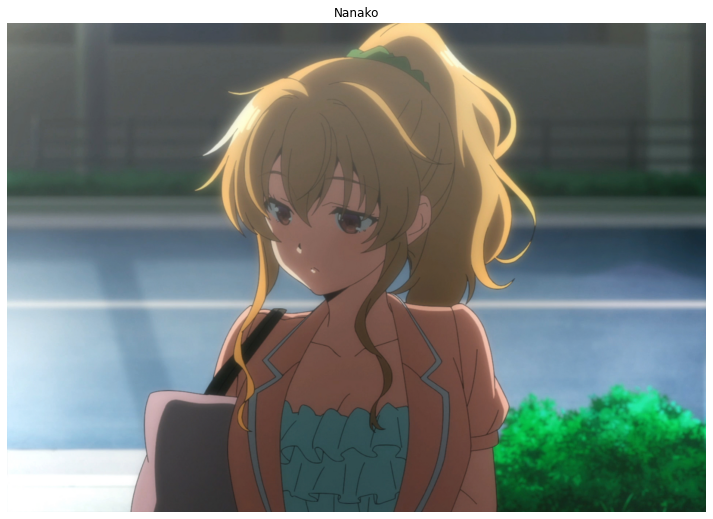

In [51]:
### RESIZE ###


### SCALING ###


### BRIGHTNESS ###

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('n@n@.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Nanako')




<h3>Morphological Operations

In [52]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


### DILATION AND EROSION ###

### OPENING AND CLOSING ###

### TOP-HAT

### GRADIENT

### EXTREMUM



<h3>Gaussian Image Processing

Text(0.5, 1.0, 'Marin')

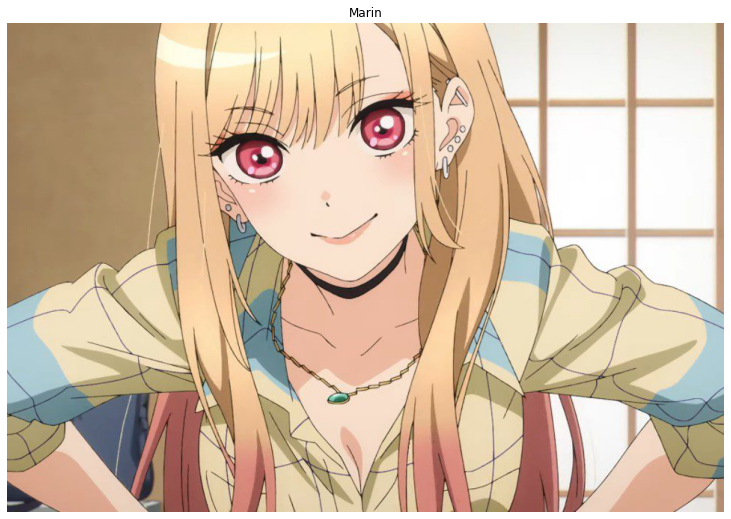

In [53]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('marin.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Marin')

<h3> Masks

Text(0.5, 1.0, 'Maha')

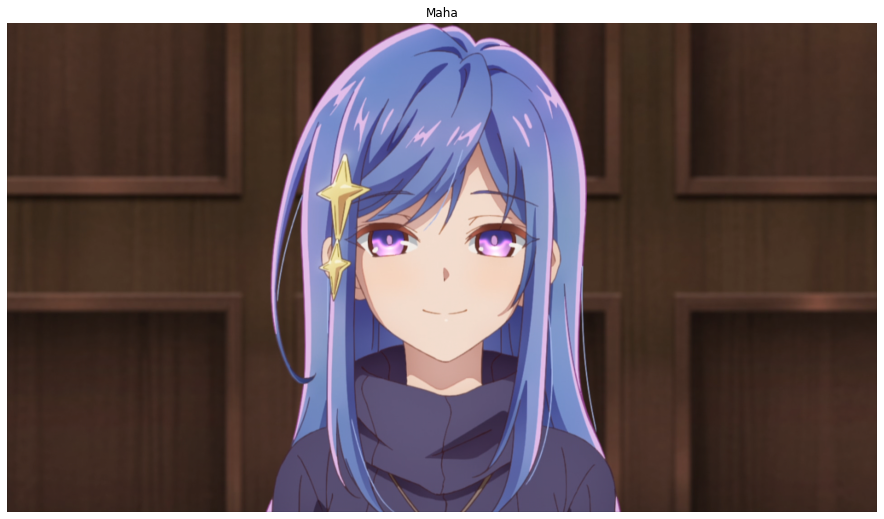

In [54]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('maha.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Maha')

<h3> Segmentation

<h3>Edge Detection

Text(0.5, 1.0, 'Anime Boy')

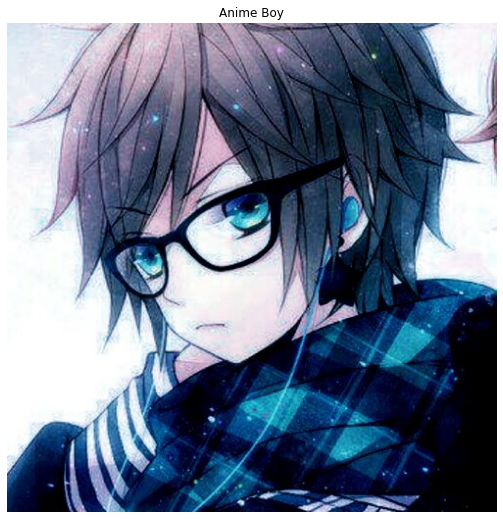

In [55]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('anime-pic.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Anime Boy')

<h3> Filter Vignette


Text(0.5, 1.0, 'Rudeus')

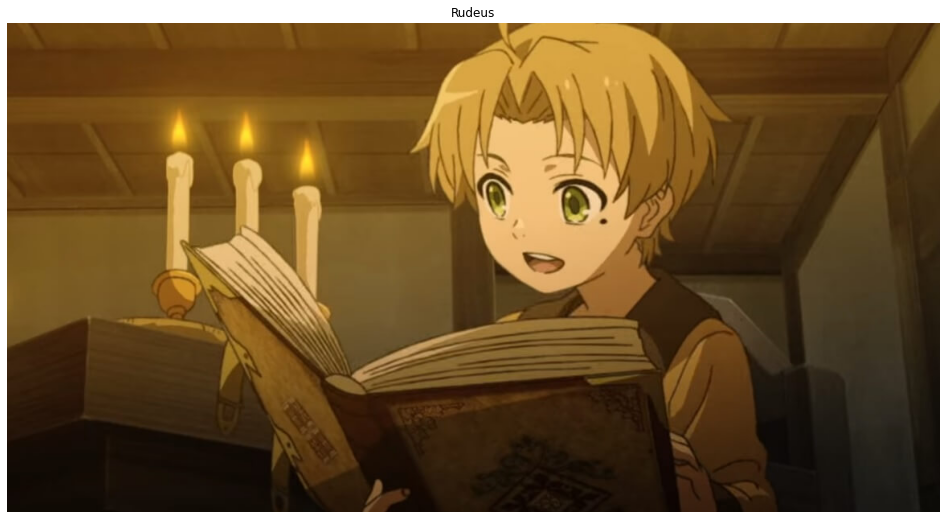

In [56]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('rudeus.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Rudeus')

<h3>Face Detection with Haar's

Text(0.5, 1.0, 'Tokyo Revengers')

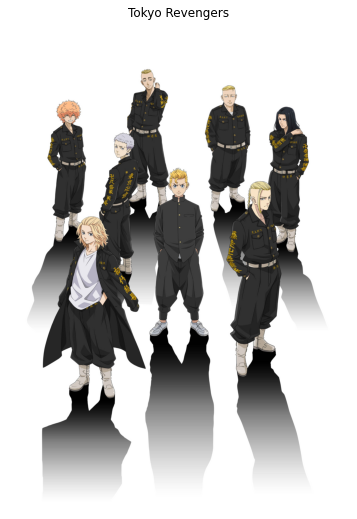

In [57]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('tokyo-revengers.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



plt.imshow(img)
plt.axis('off')
plt.title('Tokyo Revengers')
